## Big Data Set Supervised Classification -- July 23, 2019

In [14]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import matplotlib as mpl
from hdf5manager import hdf5manager as h5
from pandas import pandas as pd
from pandas import DataFrame
from skimage.measure import label, regionprops
import scipy
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
from scipy.ndimage.filters import gaussian_filter, convolve
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
from waveletAnalysis import waveletAnalysis as wave
from timecourseAnalysis import *
import cv2
import os
import seaborn as sns
from time import time

In [15]:
path = '/Users/emmadionne/Documents/'
file = '170721_07_c1_gridOpticFlow_metrics.csv'
tsv_output_file = path + file
data_big = pd.DataFrame.from_csv(tsv_output_file)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [16]:
%matplotlib inline
col_list = list(data_big)
#puts the paramter on a scale of 0 to 1
data_big = data_big.copy()
data_big -= data_big.min()
data_big /= data_big.max()
data_big = data_big.fillna(value=0)

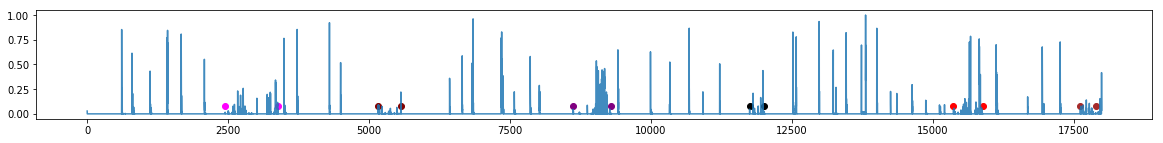

In [22]:
plt.figure(figsize=(20,2))
plt.plot(data_big["mov.mean"], alpha = 0.85)
#/plt.plot(data_big["brain.data"], alpha = 0.75)
plt.scatter(2445, 0.078, color = "magenta")
plt.scatter(3387, 0.078, color = "magenta")
plt.scatter(5166, 0.078, color = "maroon")
plt.scatter(5568, 0.078, color = "maroon")
plt.scatter(8617, 0.078, color = "purple")
plt.scatter(9297, 0.078, color = "purple")
plt.scatter(11751, 0.078, color = "black")
plt.scatter(12011, 0.078, color = "black")
plt.scatter(15367, 0.078, color = "red")
plt.scatter(15888, 0.078, color = "red")
plt.scatter(17619, 0.078, color = "brown")
plt.scatter(17893, 0.078, color = "brown")

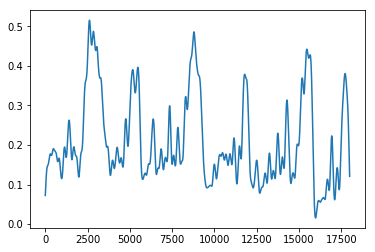

In [21]:
value = smooth(data_big["brain.data"], 300, win_type = "han")
#     value = np.convolve(data_big["brain.data"], np.ones(300)/300)
#plt.plot(data_big["brain.data"])
plt.plot(value)

In [6]:
indices_big = np.zeros(len(data_big))
indices_big[2445 : 3388] = 1
indices_big[5166 : 5569] = 1
indices_big[8617 : 9298] = 1
indices_big[11751 : 12024] = 1
indices_big[15367 : 15889] = 1
indices_big[17619 : 17894] = 1
data_big['classification'] = indices_big

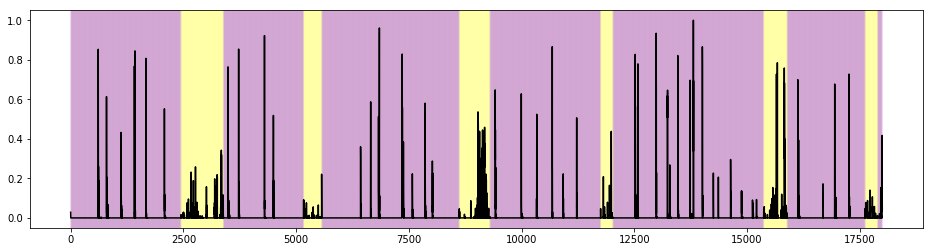

In [39]:
def plot_classification(data, indices, color):
    colors_list = ["violet", "magenta", "teal", "silver", "salmon", "pink"]
    num_color = 0;
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color = 'blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color = 'orange', alpha = 0.01)
            elif (indices[i] == 2):
                plt.axvline(x = i, color = 'green', alpha = 0.01 )
            elif (indices[i] == 3 ):
                plt.axvline(x = i, color = 'purple', alpha = 3)
            else:
                if (num_color == len(colors_list)):
                    num_color = 0
                else:
                    plt.axvline(x = i, color = colors_list[num_color], alpha = 0.01)
                    num_color += num_color
                
    else:
        for i in range(len(indices)):
            if (indices[i] == 1):
                plt.axvline(x = i, color = 'yellow', alpha = 0.01)
            else:
                plt.axvline(x = i, color = 'purple', alpha = 0.01)
    
    plt.figure(figsize = (16, 4))
    plt.plot(data, color)
plot_classification(data_big["mov.mean"], indices_big, "black")

In [42]:
var = pd.DataFrame()
var["mov.range"] = data_big["mov.range"]
var["mov.eventrest"] = data_big["mov.eventrest"]
var["mov.surfarea"] = data_big["mov.surfarea"]
var["mov.diffxystd"] = data_big["mov.diffxystd"]
var["mov.diffmaxevents"] = data_big["mov.diffmaxevents"]
var["mov.percenterror"] = data_big["mov.percenterror"]
var["brain.data"] = data_big["brain.data"]
var["brain.eventrest"] = data_big["brain.eventrest"]
var["brain.rangemaxmin"] = data_big["brain.rangemaxmin"]
var["diff.brainmov"] = data_big["diff.brainmov"]

var_names = ["mov.range", "mov.eventrest", "mov.surfarea", "mov.diffxystd", "mov.diffmaxevents", 
             "mov.percenterror", "brain.data", "brain.eventrest", "brain.rangemaxmin", "diff.brainmov"]

## Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = data_big.loc[:,'classification']

X_train, X_test, y_train, y_test = train_test_split(var, y, 
            test_size=0.3, random_state=42)
#Logistic Regression
logreg = LogisticRegression(C  = 1, solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on test set:\t\
                {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set:	                0.92


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(C=1, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

                     not pred.          pred.
       not act.           4268            163
           act.            294            675


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4431
         1.0       0.81      0.70      0.75       969

   micro avg       0.92      0.92      0.92      5400
   macro avg       0.87      0.83      0.85      5400
weighted avg       0.91      0.92      0.91      5400



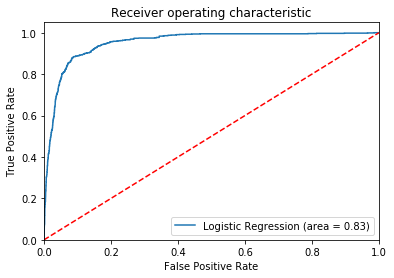

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

var.loc[X_test.index, 'logreg_prob'] = logreg.predict_proba(X_test)[:, 1]
var.loc[X_train.index, 'logreg_prob'] = logreg.predict_proba(X_train)[:, 1]

## Gaussian Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB(var_smoothing= 0.25)
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.25)

In [17]:
y_pred = gnb.predict(X_test)

print('Accuracy of Gaussian NB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of Gaussian NB classifier on test set: 0.86


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

                     not pred.          pred.
       not act.           4254            177
           act.            558            411


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      4431
         1.0       0.70      0.42      0.53       969

   micro avg       0.86      0.86      0.86      5400
   macro avg       0.79      0.69      0.72      5400
weighted avg       0.85      0.86      0.85      5400



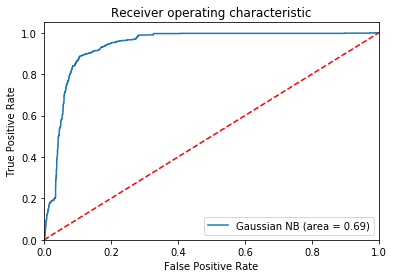

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

var.loc[X_test.index, 'gnb_prob'] = gnb.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'gnb_prob'] = gnb.predict_proba(X_train)[:,1]

## Support Vector Machine Classifier with Gaussian Kernel

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
svm_clf.fit(X_train, y_train)

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred = svm_clf.predict(X_test)

print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.92


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

                     not pred.          pred.
       not act.           4248            183
           act.            261            708


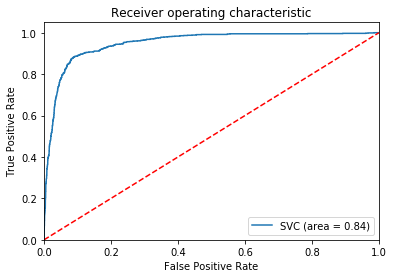

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('SVM_ROC.svg')
plt.show()

var.loc[X_test.index, 'SVC_prob'] = svm_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'SVC_prob'] = svm_clf.predict_proba(X_train)[:,1]

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_features = len(var_names), random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
y_pred = rnd_clf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rnd_clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.97


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

                     not pred.          pred.
       not act.           4355             76
           act.             93            876


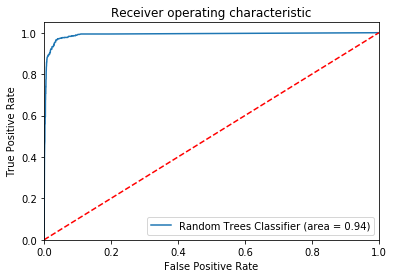

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, rnd_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rnd_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Trees Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rnd_ROC.svg')
plt.show()

var.loc[X_test.index, 'rnd_clf_prob'] = rnd_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'rnd_clf_prob'] = rnd_clf.predict_proba(X_train)[:,1]

## Voting Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression(C=1, solver = 'lbfgs', random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 50, max_features = len(var_names), random_state=42)
svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
gnb_clf = GaussianNB(var_smoothing= 0.25)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('gnb', gnb_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFores... shrinking=True,
  tol=0.001, verbose=False)), ('gnb', GaussianNB(priors=None, var_smoothing=0.25))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [33]:
y_pred = voting_clf.predict(X_test)

print('Accuracy of Voting classifier on test set: {:.2f}'.format(voting_clf.score(X_test, y_test)))

Accuracy of Voting classifier on test set: 0.95


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
col_list = ['not pred.', 'pred.']
row_list = ['not act.', 'act.']
row_format ="{:>15}" * (len(col_list) + 1)
print(row_format.format("", *col_list))
for rlist, row in zip(row_list, confusion_matrix):
    print(row_format.format(rlist, *row))

                     not pred.          pred.
       not act.           4317            114
           act.            169            800


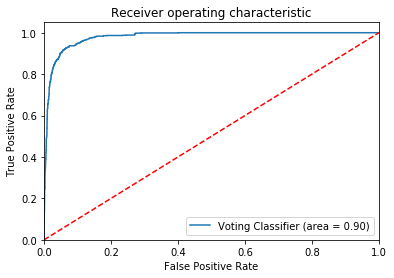

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rnd_ROC.svg')
plt.show()

var.loc[X_test.index, 'voting_clf_prob'] = voting_clf.predict_proba(X_test)[:,1]
var.loc[X_train.index, 'voting_clf_prob'] = voting_clf.predict_proba(X_train)[:,1]


# print(voting_clf.predict_proba(X_test))
# print(voting_clf.predict_proba(X_train))

## Graph of All Classifiers

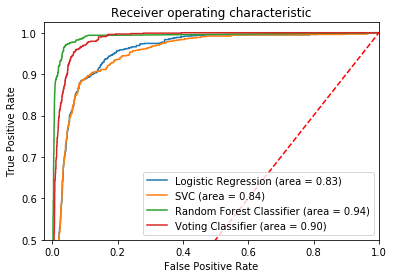

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()

logreg = LogisticRegression(C=1, solver='lbfgs')
logreg.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)

svm_clf = SVC(kernel="rbf", gamma=0.01, C=50, random_state=42, probability= True)
svm_clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)

rnd_clf = RandomForestClassifier(n_estimators = 500, max_features = len(var_names), random_state=42)
rnd_clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, rnd_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rnd_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % roc_auc)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.025, 1.0])
plt.ylim([.50, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rnd_ROC.svg')
plt.show()

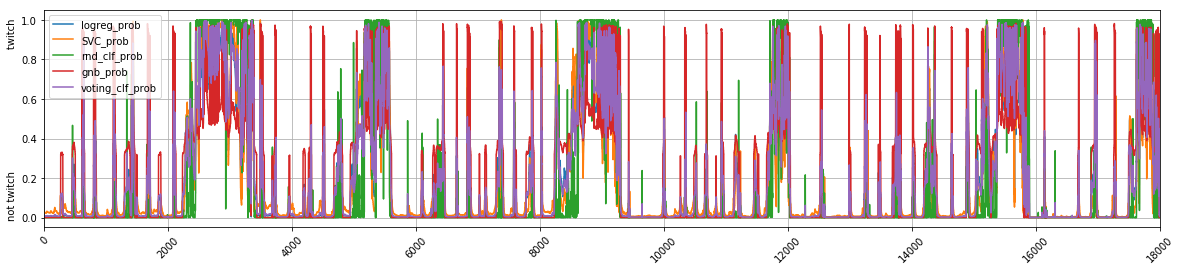

In [38]:
var.plot(y=['logreg_prob', 'SVC_prob', 'rnd_clf_prob', 'gnb_prob', 'voting_clf_prob'],
                     figsize=(20,4), rot = 45, grid=True)
plt.ylabel('not twitch                                       twitch')
#plt.savefig(path + 'classifier_prob.png')
plt.show()

## t-SNE Clustering

In [53]:
from sklearn.manifold import TSNE
print(np.sum(np.isnan(data_big)))

list_of_columns = var_names

data2 = data_big[list_of_columns].fillna(value=0).copy()
data2 = data2.replace([np.inf, -np.inf], 10**3,)
print(np.sum(np.isinf(data2)))

data2 -= data2.min()
data2 /= data2.max()
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data2.values)

plt.title('t-SNE', fontsize=14)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data2['brain.eventrest'], cmap='jet')
plt.xlabel("t-SNE_1", fontsize=1)
plt.ylabel("t-SNE_2", fontsize=18)
plt.grid(True)

# save_fig("other_dim_reduction_plot")
plt.show()

angs.stdev               0
angs.mean                0
mov.mean                 0
mov.std                  0
mov.mode                 0
mov.range                0
mov.eventrest            0
mov.maxeventval          0
mov.surfarea             0
mov.totalmag             0
mov.firstder             0
mov.secder               0
mov.stdx                 0
mov.stdy                 0
mov.diffxystd            0
mov.diffmaxevents        0
mov.percent              0
mov.percenterror         0
mov.timetoevent          0
mov.timefromevent        0
mov.numlocmax            0
brain.data               0
brain.eventrest          0
brain.rangemaxmin        0
brain.firstder           0
brain.secondder          0
diff.brainmov            0
diff.brainmovfirstder    0
diff.brainmovsecder      0
classification           0
dtype: int64
mov.range            0
mov.eventrest        0
mov.surfarea         0
mov.diffxystd        0
mov.diffmaxevents    0
mov.percenterror     0
brain.data           0
brain.eventrest 

KeyboardInterrupt: 

## Training and Testing Prediction or Not

In [52]:
# all data without exclusion
from sklearn.manifold import TSNE
#import plotly.plotly as py
#import plotly.graph_objs as go
from operator import add
#import plotly

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# a = np.arange(data.shape[0]).astype(str).tolist()
# a = ['domain ' + str(i) for i in a]
# b = ['  class ' + str(i) for i in classify]

# text = list(map(add, a, b))

tsne = TSNE(n_components=2, 
            perplexity=20, # between 5 and 50 only 
            learning_rate = 300,
            random_state=42)
X_reduced_tsne = tsne.fit_transform(var[var_names])


color = pd.DataFrame(index=data_big.index)

y_test_pred = voting_clf.predict(X_test)
y_train_pred = voting_clf.predict(X_train)

X_train_index = X_train.index.values
X_test_index = X_test.index.values

y_train_value = np.squeeze(y_train)
y_test_value = np.squeeze(y_test)

color['class'] = np.zeros(len(color))
print(color.head())


for j, ind in enumerate(X_train_index):
    if y_train_pred[j]==0:
        color.at[ind, 'class'] += 4
    if y_train_pred[j] != y_train_value[j]: # make odd if inaccurate prediction
        color.at[ind, 'class'] += 1

for j, ind in enumerate(X_test_index):
    color.at[ind, 'class'] +=2
    if y_test_pred[j]==0:
        color.at[ind, 'class'] += 4
    if y_test_pred[j] != y_test_value[j]:
        color.at[ind, 'class'] += 1
        
        
print('\nIndices used to train that are signal and predicted as signal')
print(*color.loc[color['class']==0].index, sep='\t')

print('\nIndices used to train that are signal and are predicted as NOT signal')
print(*color.loc[color['class']==1].index, sep='\t')

print('\nIndices used to test that are signal and are predicted as signal')
print(*color.loc[color['class']==2].index, sep='\t')

print('\nIndices used to test that are signal and are predicted as NOT signal')
print(*color.loc[color['class']==3].index, sep='\t')

print('\nIndices used to train that are NOT signal and are predicted as NOT signal')
print(*color.loc[color['class']==4].index, sep='\t')

print('\nIndices used to train that are NOT signal and are predicted as signal')
print(*color.loc[color['class']==5].index, sep='\t')

print('\nIndices used to test that are NOT signal and are predicted as NOT signal')
print(*color.loc[color['class']==6].index, sep='\t')

print('\nIndices used to test that are NOT signal and are predicted as signal')
print(*color.loc[color['class']==7].index, sep='\t')


## NOT WORKING!!
# l = []
# trace0= go.Scatter(
#     x= X_reduced_tsne[:, 0],
#     y= X_reduced_tsne[:, 1],
#     mode= 'markers',
#     marker= dict(size= 20,
#                 line= dict(width=1),
#                 colorbar =dict(title='effectiveness of training',
#                                 tickvals = [1,3,5,7],
#                                 ticktext = ['Signal train','Not signal train','Signal test', 'Not signal test'],
# #                                 opacity= 0.7,
# #                                 cmax =12
#                ),
#     color= color,
#     colorscale=[[0, 'rgb(170,205,225)'],[1/8, 'rgb(32,120,185)'], [2/8, 'rgb(175,226,132)'],[3/8, 'rgb(50,162,42)'],
#                 [4/8, 'rgb(255,151,157)'], [5/8, 'rgb(222,28,29)'], [6/8, 'rgb(253,189,109)'], [7/8, 'rgb(255,125,2)']],
# #      name= 'Domain',
#                 ))#,hoverinfo = text)
# # The hover text goes here...


# layout= go.Layout(
#     title= 't-SNE',
#     hovermode= 'closest',
#     xaxis= dict(
#         title= 't-sne1',
#         ticklen= 5,
#         zeroline= False,
# #         gridwidth= 2,
#         showgrid = True
#     ),
#     yaxis=dict(
#         title= 't-sne2',
#         ticklen= 5,
# #         gridwidth= 2,
#         zeroline = False,
#         showgrid =True

#     ),
#     showlegend= False,
# )

# fig = go.Figure(data=[trace0], layout=layout)
# py.iplot(fig, filename='jupyter-Freq vs minor axis of Brain regions')


# fig = plt.figure(figsize = (20,20))
plt.title('t-SNE', fontsize=14)
cax = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=color['class'], cmap='Paired', vmax = 12)
plt.xlabel("t-SNE_1", fontsize=18)
plt.ylabel("t-SNE_2", fontsize=18)
plt.grid(True)
cbar = fig.colorbar(cax, ticks=np.arange(0,12,2))
cbar.ax.set_xticklabels(['train signal', 'train other', 'test signal', 'test other'])  # horizontal colorbar
# plt.colorbar()
# plt.savefig("other_dim_reduction_plot")
plt.show()

NameError: name 'data' is not defined